# Lab2. Pytorch Regression (Linear Regression vs MLP)  

이 실습에서는 Regression Problem에 대해서 Linear Regression Hypothesis를 통해 풀어볼 겁니다. `pytorch`, `numpy`, `pandas` 등을 하나도 안쓰고 구현해보는게 본 실습의 묘미입니다.


**이 문서를 구글 Colab에서 쉽게 실행해보는법**  
1. [제가 미리 만들어놓은 이 링크](https://colab.research.google.com/github/heartcored98/Standalone-DeepLearning/blob/master/Lec2/Lab2_pytorch_regression_demo.ipynb)를 눌러 본 .ipynb 파일을 구글 Colab에서 바로 열 수 있습니다. 이때 구글에 로그인을 해야 합니다.
2. 아무 셀이나 선택한 후 `Ctrl+Enter`를 눌러 실행해보면 **[경고: 이 노트는 Google에서 작성하지 않았습니다]**라고 뜨는데 `실행 전에 모든 런타임 재설정`을 선택한 채로 `무시하고 계속하기`를 눌러줍니다.  
3. **[모든 런타임 재설정]** 이 뜰 텐데 `예`를 눌러줍니다.  
4. 잠시 구글 서버의 배치가 되면서 우상단에 `연결중` -> `초기화중` -> `연결됨`이 뜨면서 실행이 가능한 상태가 됩니다.  

**이 문서를 구글 Colab에서 어렵게 실행해보는법**  
1. 구글 Colab 문서를 하나 만들어줍시다. 
2. 본 문서에 있는 셀에 있는 코드를 드래그 한 후 `Ctrl+C`를 눌러줍시다.  
3. 구글 Colab 문서에 가서 `Ctrl+V`를 눌러줍시다.
4. 모든 셀이 다 복사될 때까지 1~3 무한반복!  

**구글 Colab에서 실습후 저장하는법**  
**쉽게 실행보는법**을 따라오셨다면 Colab에서 임시 노트북으로 열리기 때문에 `파일`->`드라이브로 저장`을 눌러서 여러분의 구글 드라이브에 저장하거나 `파일` -> `.ipynb 다운로드`를 눌러서 다운로드 해줍시다.   

*Written by. 조재영(whwodud9@kaist.ac.kr) 2019.01.20 *

### 1. Data Generation  (Preparation)

Linear Regression 실습에 사용할 데이터를 만들어봅시다. 이번에는 X가 2차원 Y가 1차원인 상황입니다.  
아래 관계를 따르는 데이터 분포가 있다고 합시다.

$$y = \ 2 sin(x_1) + log({1 \over 2}x_2^2)$$

X, Y 데이터를 3D 공간에 시각화 해볼까요?  
`numpy`의 `random.rand()` 함수를 사용하면 n개의 랜덤 샘플을 0~1의 uniform distribution에서 샘플링할 수 있습니다.

(5000, 2) (5000,)


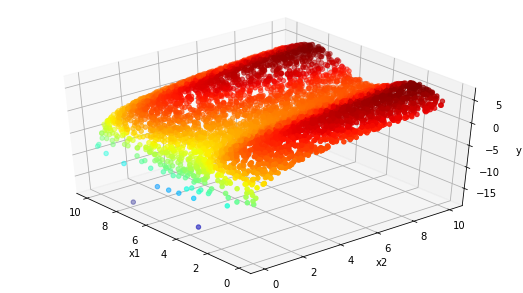

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

n_data = 5000
x1 = np.random.rand(n_data) * 10
x2 = np.random.rand(n_data) * 10
X = np.array([x1, x2]).T
y = 2*np.sin(x1) + np.log(0.5*x2**2)
print(X.shape, y.shape)

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x1, x2, y, c=y, cmap='jet')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(40, -40)
ax.invert_xaxis()

plt.show()

### 2. Hypothesis Define (Model Define)  

Linear Regression 시에 활용하는 H(x) = Wx + b를 파이토치로 구현할 때는 단순하게 `nn.Linear` 모듈을 하나 만들어주면 됩니다. 이 때`in_features`는 x의 차원이고, `out_features`는 y의 차원입니다.  


**Data Set**  
$$X \in \mathcal{R}^{5000 \times 2}, Y \in \mathcal{R}^{5000}$$

**Linear Model**   
$$H(X) = \ XW + b \ \ ( W \in \mathcal{R}^{2 \times 1}, b \in \mathcal{R}^{1})$$


**MLP Model**
$$Let \ relu(X) = \ max(X, 0)$$  

$$h = \ relu(X W_1 + b_1) \ \  ( W_1 \in \mathcal{R}^{2 \times 200}, b_1 \in \mathcal{R}^{200}, h \in \mathcal{R}^{5000 \times 200}$$  

$$H = \ h W_2 + b_2  \ \  ( W_2 \in \mathcal{R}^{200 \times 1}, b_2 \in \mathcal{R}^{1}, H \in \mathcal{R}^{5000  \times 1})$$

In [72]:
import torch
import torch.nn as nn


class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2, out_features=1, bias=True)
    
    def forward(self, x):
    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴합니다.
        return self.linear(x)
    
    
class MLPModel(nn.Module):
    def __init__(self): 
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴합니다.
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

### 3. Cost Function Define (Loss Function Define)  

Regression Problem 에서의 Loss Function을 작성해봅시다.  
파이토치의 `nn` 아래에는 다양한 Loss Function이 이미 구현되어 있습니다.  
[여기](https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html)에서 파이토치 내부에 구현되어 있는 MSE, Cross-Entropy, KL-Divergence 등을 확인할 수 있습니다.  
이 실습에서는 Regression Problem 이므로 Mean Squared Error 즉 MSE Loss를 써봅시다.

In [51]:
reg_loss = nn.MSELoss()

test_pred_y = torch.Tensor([0,0,0,0])
test_true_y = torch.Tensor([0,1,0,1])

print(reg_loss(test_pred_y, test_true_y))
print(reg_loss(test_true_y, test_true_y))

tensor(0.5000)
tensor(0.)


### 4. Train & Monitor Training Process  
이제 모델도 정의했고 Loss Function도 정의했으니 한번 학습시켜볼까요?  
저번에는 저희가 직접 파라미터(w 하나)에 따른 loss의 편미분을 유도하고 거기서 나온 그라디언트로 w를 업데이트했는데요.  
`pytorch`에서는 loss.backward() 라는 기능을 쓰면 알아서 loss를 계산되는데 사용한 각 파라미터에 대한 loss의 편미분을 계산해줍니다.  
이후 `optimizer.step()` 함수를 사용하면 각 파라미터의 그라디언트를 바탕으로 파라미터의 값을 조금씩 업데이트 해줍니다.  

801 parameters


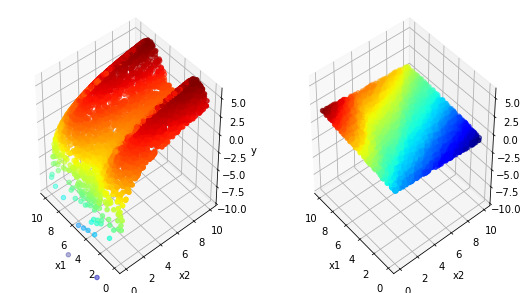

0 tensor(10.6201, grad_fn=<MseLossBackward>)


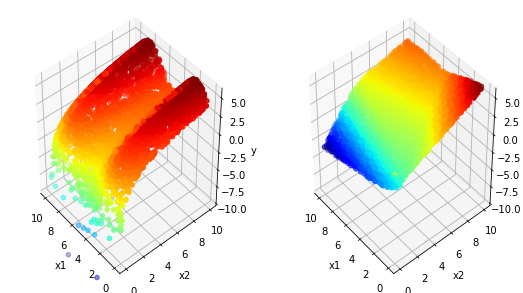

200 tensor(2.2049, grad_fn=<MseLossBackward>)


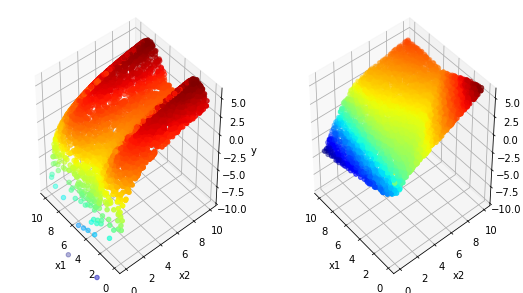

400 tensor(1.9553, grad_fn=<MseLossBackward>)


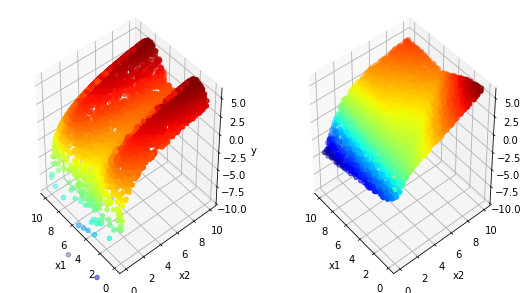

600 tensor(1.7995, grad_fn=<MseLossBackward>)


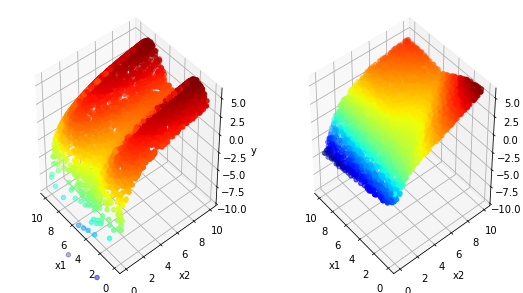

800 tensor(1.6837, grad_fn=<MseLossBackward>)


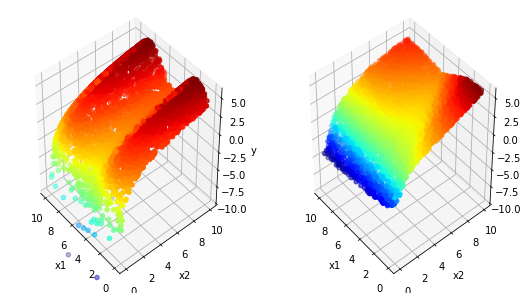

1000 tensor(1.5859, grad_fn=<MseLossBackward>)


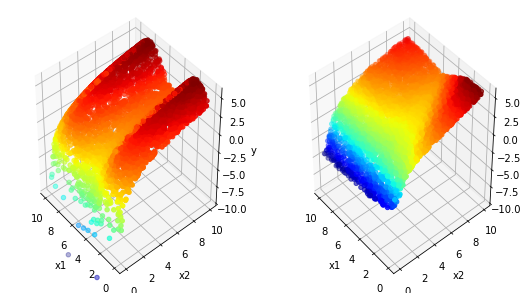

1200 tensor(1.4951, grad_fn=<MseLossBackward>)


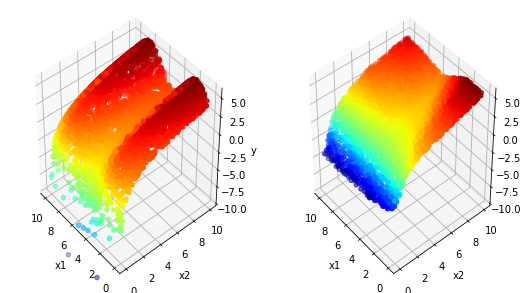

1400 tensor(1.4126, grad_fn=<MseLossBackward>)


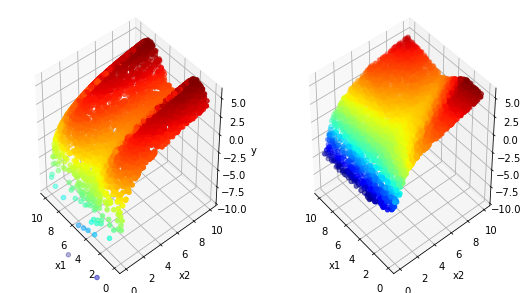

1600 tensor(1.3399, grad_fn=<MseLossBackward>)


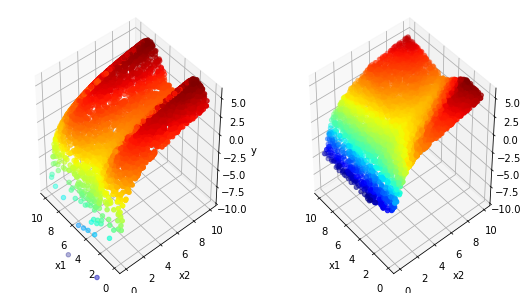

1800 tensor(1.2774, grad_fn=<MseLossBackward>)


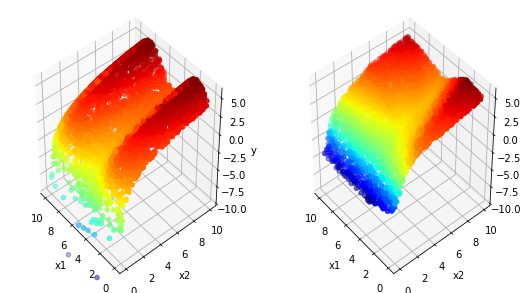

2000 tensor(1.2249, grad_fn=<MseLossBackward>)


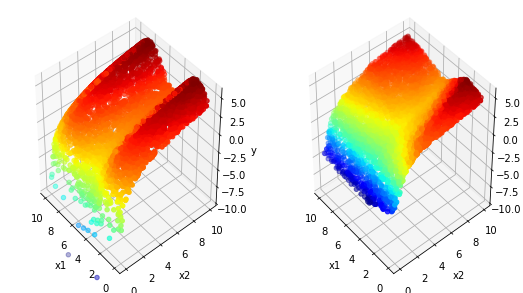

2200 tensor(1.1786, grad_fn=<MseLossBackward>)


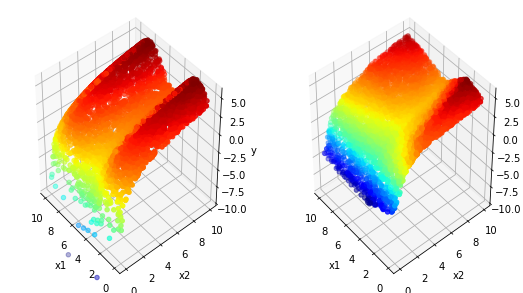

2400 tensor(1.1369, grad_fn=<MseLossBackward>)


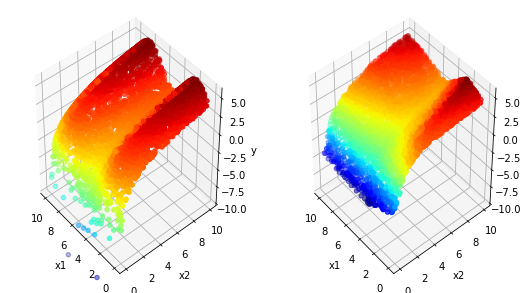

2600 tensor(1.1002, grad_fn=<MseLossBackward>)


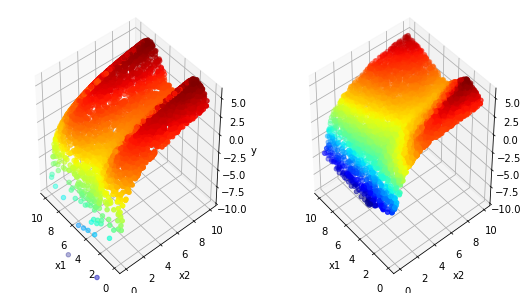

2800 tensor(1.0672, grad_fn=<MseLossBackward>)


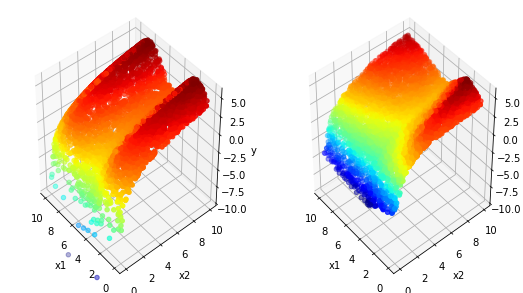

3000 tensor(1.0361, grad_fn=<MseLossBackward>)


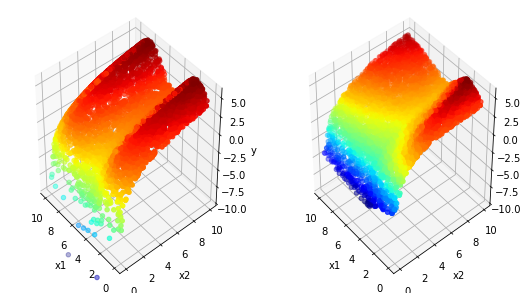

3200 tensor(1.0072, grad_fn=<MseLossBackward>)


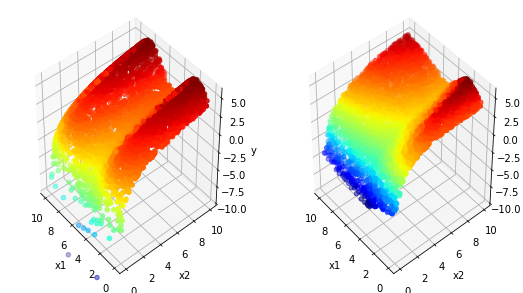

3400 tensor(0.9813, grad_fn=<MseLossBackward>)


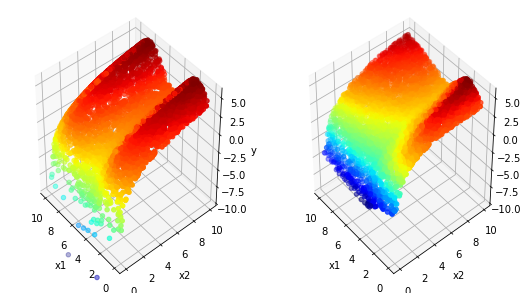

3600 tensor(0.9578, grad_fn=<MseLossBackward>)


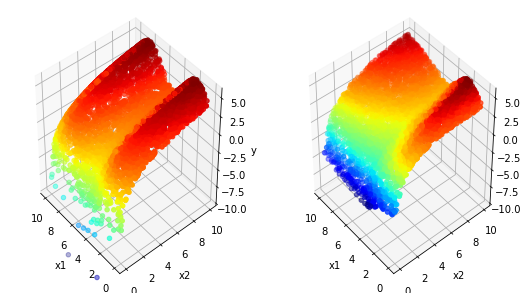

3800 tensor(0.9367, grad_fn=<MseLossBackward>)


In [77]:
import torch.optim as optim


# model = LinearModel()
# print(model.linear.weight)
# print(model.linear.bias)

model = MLPModel() # Model을 생성해줍니다.
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) # 복잡해보이지만 간단히 모델 내에 학습을 당할 파라미터 수를 카운팅하는 코드입니다.

lr = 0.005 # Learning Rate를 하나 정해줍니다. (원할한 학습을 위해 손을 많이 탑니다)
optimizer = optim.SGD(model.parameters(), lr=lr) # Optimizer를 생성해줍니다.

# 매 학습 단계에서의 epoch값과 그 때의 loss 값을 저장할 리스트를 만들어줍시다.
list_epoch = [] 
list_loss = []

epoch = 4000 # 학습 횟수(epoch)을 지정해줍시다.
for i in range(epoch):
    
    model.train()
    optimizer.zero_grad()
    
    input_x = torch.Tensor(X)
    true_y = torch.Tensor(y)
    pred_y = model(input_x)
#     print(input_x.shape, true_y.shape, pred_y.shape) # 각 인풋과 아웃풋의 차원을 체크해봅니다.
    
    loss = reg_loss(pred_y.squeeze(), true_y)
    loss.backward() # backward()를 통해서 그라디언트를 구해줍니다.
    optimizer.step() # step()을 통해서 그라디언틀르 바탕으로 파라미터를 업데이트 해줍니다. 

    list_epoch.append(i)
    list_loss.append(loss.detach().numpy())
    
    if i % 200 == 0: # 200회의 학습마다 실제 데이터 분포와 모델이 예측한 분포를 그려봅니다.
        fig = plt.figure(figsize=(9,5))
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        ax1.scatter(X[:, 0], X[:, 1], y, c=y, cmap='jet')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.invert_xaxis()

        ax2 = fig.add_subplot(1, 2, 2, projection='3d')
        ax2.scatter(X[:, 0], X[:, 1], pred_y.detach().numpy(), c=pred_y.detach().numpy()[:,0], cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.invert_xaxis()
        
        plt.show()
        print(i, loss)

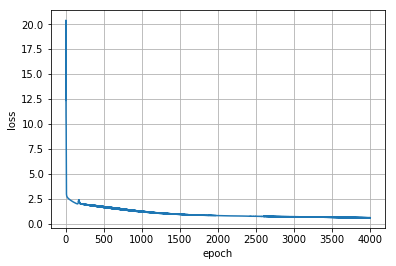

In [71]:
plt.plot(list_epoch, list_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
# plt.ylim(0, 100)
plt.grid()
plt.show()